In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from keras import layers

In [34]:
df = pd.read_csv("C:/AI_study/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [36]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [3]:
df['activity'].value_counts()

lyingRigh                  480
crossTrainer               480
standingInElevatorStill    480
runningTreadmill           480
cyclingHorizontal          480
jumping                    480
walkingLot                 480
walkingTreadmillIncline    480
movingInElevator           480
ascendingStairs            480
sitting                    480
basketBall                 480
decendingStairs            480
walkingTreadmillFlat       480
cyclingVertical            480
standing                   480
lyingBack                  480
rowing                     480
stepper                    480
Name: activity, dtype: int64

In [4]:
df = df.drop('people', axis=1)

In [5]:
# AE 실습을 위해 사용할 세 가지 값만 선택
df_filtered = df[df['activity'].isin(['lyingRigh', 'lyingBack', 'standingInElevatorStill'])]
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.417440,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,lyingBack
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.403720,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,lyingBack
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.426160,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,lyingBack
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.308770,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,lyingBack
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.389000,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,lyingBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,9.802530,9.8423,9.6857,0.000865,0.029403,-1.341638,-0.185503,-0.090833,-0.25891,0.001316,...,4.094967e-05,0.006399,-0.962316,0.488304,0.51448,0.46222,5.126574e-05,0.007160,-0.717994,standingInElevatorStill
3356,9.799047,9.9038,9.7250,0.000750,0.027379,0.468885,-0.200147,-0.113400,-0.29976,0.001781,...,3.938668e-05,0.006276,-0.513505,0.488314,0.51509,0.46554,4.488257e-05,0.006699,0.136985,standingInElevatorStill
3357,9.797938,9.8537,9.7347,0.000576,0.023998,-0.365021,-0.195523,-0.132300,-0.25615,0.001006,...,3.456590e-05,0.005879,0.691562,0.486659,0.51104,0.46926,4.251657e-05,0.006520,0.178792,standingInElevatorStill
3358,9.606040,9.9302,9.1379,0.067806,0.260396,-0.719145,-0.188162,-0.119480,-0.25154,0.000760,...,6.375183e-05,0.007984,-0.736630,0.490615,0.53319,0.46602,8.602620e-05,0.009275,1.175198,standingInElevatorStill


In [6]:
df_filtered['activity'].value_counts()

lyingRigh                  480
standingInElevatorStill    480
lyingBack                  480
Name: activity, dtype: int64

In [7]:
# 새로운 Class 컬럼 추가
df_filtered['Class'] = 'undefined'  # 우선 기본 값을 설정

# activity가 lyingRigh 또는 lyingBack인 경우 Class를 normal로 설정
df_filtered.loc[df['activity'].isin(['lyingRigh', 'lyingBack']), 'Class'] = 0

# activity가 jumping인 경우 Class를 abnormal로 설정
df_filtered.loc[df['activity'] == 'standingInElevatorStill', 'Class'] = 1

# 기존의 activity 행을 제거해서 df 변경
df = df_filtered.drop('activity', axis=1)

df

C:\Users\User\.conda\envs\test01\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\.conda\envs\test01\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,Class
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.417440,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,0
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.403720,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,0
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.426160,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,0
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.308770,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,0
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.389000,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,9.802530,9.8423,9.6857,0.000865,0.029403,-1.341638,-0.185503,-0.090833,-0.25891,0.001316,...,4.094967e-05,0.006399,-0.962316,0.488304,0.51448,0.46222,5.126574e-05,0.007160,-0.717994,1
3356,9.799047,9.9038,9.7250,0.000750,0.027379,0.468885,-0.200147,-0.113400,-0.29976,0.001781,...,3.938668e-05,0.006276,-0.513505,0.488314,0.51509,0.46554,4.488257e-05,0.006699,0.136985,1
3357,9.797938,9.8537,9.7347,0.000576,0.023998,-0.365021,-0.195523,-0.132300,-0.25615,0.001006,...,3.456590e-05,0.005879,0.691562,0.486659,0.51104,0.46926,4.251657e-05,0.006520,0.178792,1
3358,9.606040,9.9302,9.1379,0.067806,0.260396,-0.719145,-0.188162,-0.119480,-0.25154,0.000760,...,6.375183e-05,0.007984,-0.736630,0.490615,0.53319,0.46602,8.602620e-05,0.009275,1.175198,1


In [8]:
df.shape

(1440, 271)

In [9]:
LABELS = ["Normal", "Abnormal"]

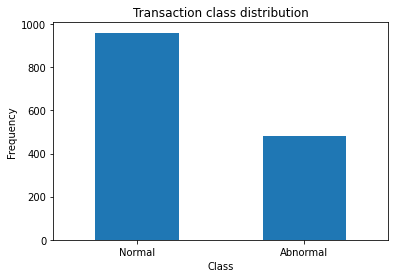

In [10]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [11]:
abnormal = df[df.Class == 1]
normal = df[df.Class == 0]
print(abnormal.shape)
print(normal.shape)

(480, 271)
(960, 271)


In [12]:
RANDOM_SEED = 42

In [13]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(765, 270)

## Symmetrci AE

In [14]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [15]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 0s 48ms/step - loss: 5.7517 - val_loss: 5.6963
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 5.7393 - val_loss: 5.6816
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7209 - val_loss: 5.6589
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 5.6937 - val_loss: 5.6274
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 5.6581 - val_loss: 5.5864
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 5.6130 - val_loss: 5.5375
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 5.5609 - val_loss: 5.4833
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 5.5042 - val_loss: 5.4256
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 5.4446 - val_loss: 5.3665
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 5.3846 - val_loss: 5.3076
Epoch 11/50
3/3 [=====================

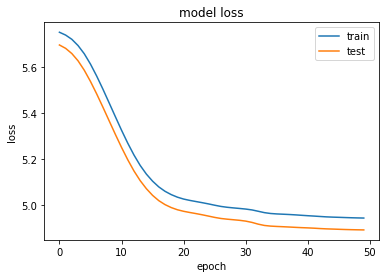

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [17]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error
count,288.000000
mean,4.990508
std,0.304487
min,4.586983
25%,4.735293
50%,4.950556
75%,5.135221
max,6.972876


In [18]:
error_df.head()

,reconstruction_error,true_class
1128,5.040044,0
1565,5.017325,0
1508,5.156378,0
1025,5.474060,0
1588,5.016866,0


In [19]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 5

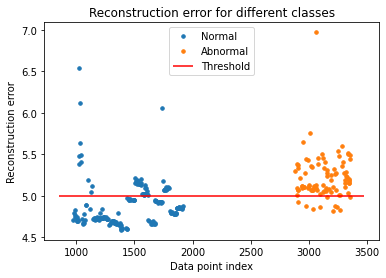

In [20]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [21]:
error_df['true_class'] = error_df['true_class'].astype(int)

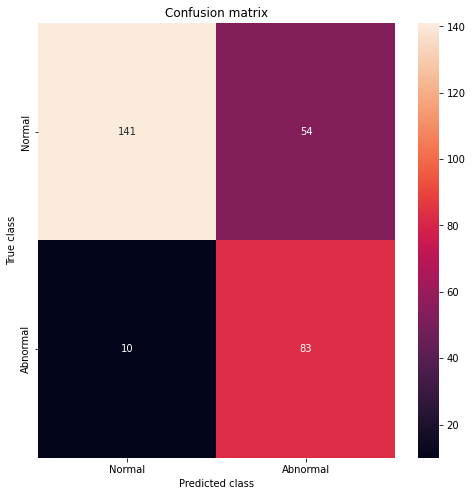

              precision    recall  f1-score   support

           0       0.93      0.72      0.82       195
           1       0.61      0.89      0.72        93

    accuracy                           0.78       288
   macro avg       0.77      0.81      0.77       288
weighted avg       0.83      0.78      0.78       288



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

## Asymmetric Autoencoder

In [23]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

Asy_autoencoder = Model(inputs=input_layer, outputs=decoded)
Asy_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [24]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = Asy_autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 0s 33ms/step - loss: 5.7662 - val_loss: 5.7110
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7595 - val_loss: 5.7078
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7567 - val_loss: 5.7053
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7542 - val_loss: 5.7023
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7509 - val_loss: 5.6983
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 5.7467 - val_loss: 5.6928
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7409 - val_loss: 5.6854
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 5.7329 - val_loss: 5.6753
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7218 - val_loss: 5.6615
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 5.7066 - val_loss: 5.6417
Epoch 11/50
3/3 [=====================

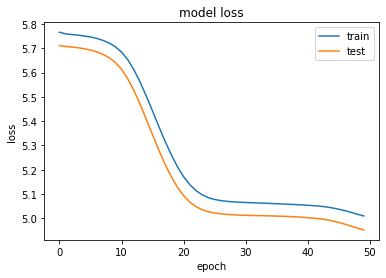

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [26]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = Asy_autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error
count,288.000000
mean,5.037700
std,0.307719
min,4.543342
25%,4.789878
50%,5.054048
75%,5.184409
max,6.907825


In [27]:
error_df.head()

,reconstruction_error,true_class
1128,5.347352,0
1565,5.187739,0
1508,5.168948,0
1025,5.411105,0
1588,5.187317,0


In [28]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 5

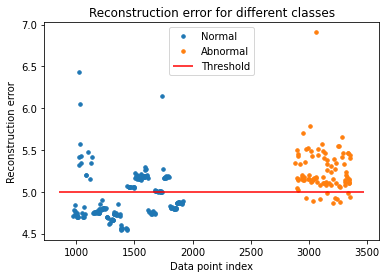

In [29]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [30]:
error_df['true_class'] = error_df['true_class'].astype(int)

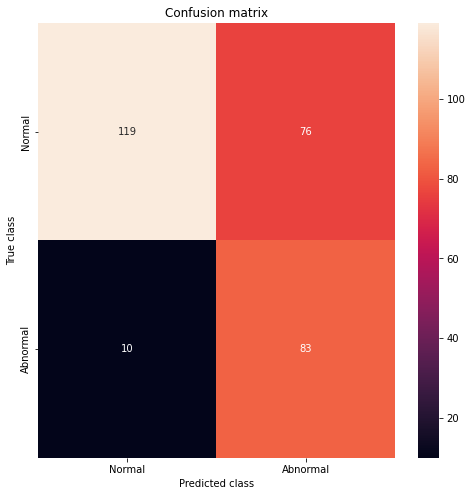

              precision    recall  f1-score   support

           0       0.92      0.61      0.73       195
           1       0.52      0.89      0.66        93

    accuracy                           0.70       288
   macro avg       0.72      0.75      0.70       288
weighted avg       0.79      0.70      0.71       288



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))